# TELESCOPIO ESPACIAL JAMES WEBB
PLANTEAMIENTO DEL SISTEMA DE ECUACIONES PARA EL TELESCOPIO

- Concición de perperdicularidad
- Ubicacion de los pistones

<p align="center">
<img src="Imagenes/Telescopio_espacial.png" alt="image" width="600"/>
</p>

DESCRIPCION DEL MODELO:
- El centro de la base 'B' se encuentra en *(0,0)*
- El punto *P($x_{1}$,$y_{1}$)* representa el objetivo al que el espejo debe orientarse

### CONDICIÓN DE PERPERDICULARIDAD
Para asegurar que el espejo secundario esté orientado de forma que su superficie sea perpendicular a la dirección hacia el punto *P($x_{1}$,$y_{1}$)*, consideremos la siguiente geometría y planteamiento:
- **Punto medio del espejo:**  Llamaremos *L($x_{2}$,$y_{2}$)* al punto medio del espejo, ubicado en una posición específica en el plano cartesiano.
- **Vector hacia el punto objetivo, $\vec{P}$:** Definimos el vector que va desde el punto medio del espejo *L($x_{2}$,$y_{2}$)* hacia el punto *P($x_{1}$,$y_{1}$)* como: <br>
  $\vec{P}$=($x_{1}$-$x_{2}$ , $y_{1}$-$y_{2}$)
- **Vector normal del espjo, $\vec{L}$:** Para cumplir con la condición de perpendicularidad, necesitamos un vector normal al espejo secundario. Definimos este vector normal $\vec{L}$ como: <br>
  $\vec{L}$=(-($y_{1}$-$y_{2}$),$x_{1}$-$x_{2}$) <br>
  De tal manera que si realizamos un producto punto entre $\vec{P}$ y $\vec{L}$ este de cero.


Vector P: [2 2]
Vector L: [-2  2]
Producto punto (P . L): 0
El espejo está correctamente orientado hacia el punto P, es perpendicular.


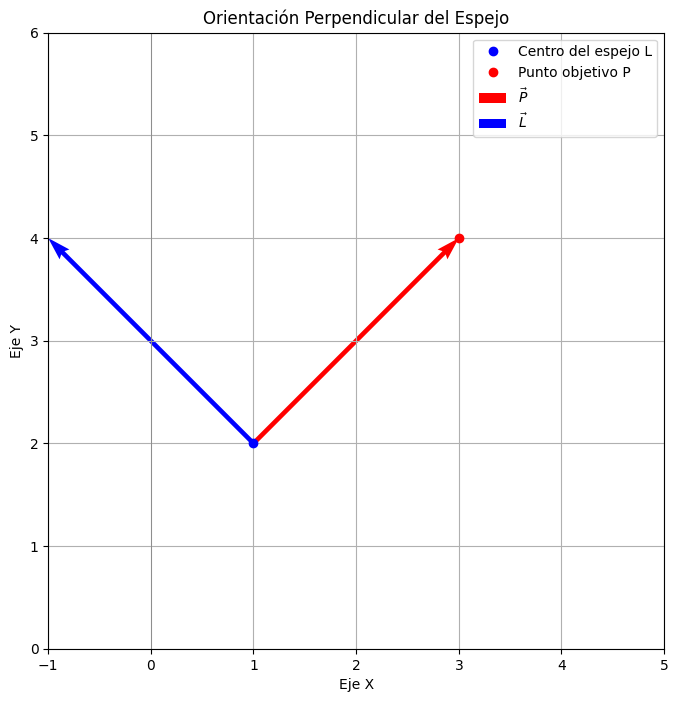

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def verificar_perpendicularidad_grafica(x1, y1, x2, y2):
    # Definir el vector P desde L(x2, y2) hasta P(x1, y1)
    vector_P = np.array([x1 - x2, y1 - y2])
    
    # Definir el vector normal L, que es perpendicular a P
    vector_L = np.array([-(y1 - y2), x1 - x2])
    
    # Calcular el producto punto
    producto_punto = np.dot(vector_P, vector_L)
    
    # Verificar la condición de perpendicularidad
    es_perpendicular = np.isclose(producto_punto, 0)
    
    # Mostrar resultados
    print("Vector P:", vector_P)
    print("Vector L:", vector_L)
    print("Producto punto (P . L):", producto_punto)
    
    if es_perpendicular:
        print("El espejo está correctamente orientado hacia el punto P, es perpendicular.")
    else:
        print("El espejo NO está correctamente orientado hacia el punto P, no es perpendicular.")
    
    # Graficar
    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='grey',linewidth=0.5)
    plt.axvline(0, color='grey',linewidth=0.5)

    # Punto L
    plt.plot(x2, y2, 'bo', label="Centro del espejo L")
    # Punto P
    plt.plot(x1, y1, 'ro', label="Punto objetivo P")

    # Dibujar vector P (desde L hacia P)
    plt.quiver(x2, y2, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='r', label=r"$\vec{P}$")
    
    # Dibujar vector L (vector normal al espejo)
    plt.quiver(x2, y2, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='b', label=r"$\vec{L}$")
    
    # Configuración de la gráfica
    plt.xlim(min(x1, x2) - 2, max(x1, x2) + 2)
    plt.ylim(min(y1, y2) - 2, max(y1, y2) + 2)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Orientación Perpendicular del Espejo")
    plt.legend()
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Ejemplo de uso con coordenadas de L y P
x1, y1 = 3, 4   # Coordenadas del punto P
x2, y2 = 1, 2   # Coordenadas del punto medio del espejo L

verificar_perpendicularidad_grafica(x1, y1, x2, y2)


### UBICACION DE LOS PISTONES

La longitud del pistón 1 es válida: 3.16
La longitud del pistón 2 es válida: 3.61


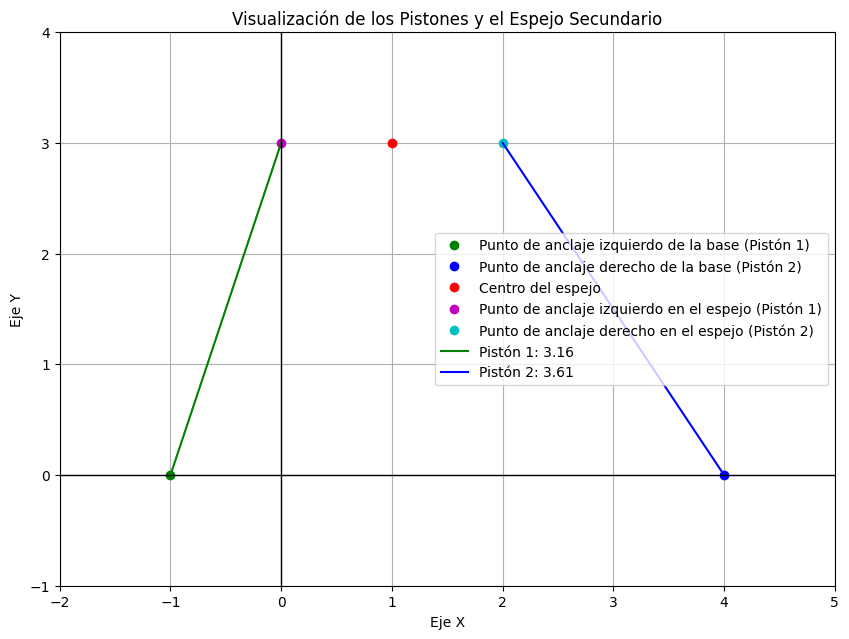

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las longitudes de los pistones
def calcular_longitudes_pistones(x3, x4, x2, y2, A, C, B):
    # Calcular la longitud del pistón 1
    pistón1 = np.sqrt(((x2 - C/2) - (x3 - A/2))**2 + y2**2)
    
    # Calcular la longitud del pistón 2
    pistón2 = np.sqrt(((x2 + C/2) - (x4 + A/2))**2 + y2**2)
    
    # Verificar si las longitudes están dentro del rango permitido [B/2, B]
    if pistón1 < B/2 or pistón1 > B:
        print(f"La longitud del pistón 1 ({pistón1:.2f}) no está en el rango permitido [{B/2}, {B}]")
    else:
        print(f"La longitud del pistón 1 es válida: {pistón1:.2f}")
        
    if pistón2 < B/2 or pistón2 > B:
        print(f"La longitud del pistón 2 ({pistón2:.2f}) no está en el rango permitido [{B/2}, {B}]")
    else:
        print(f"La longitud del pistón 2 es válida: {pistón2:.2f}")
    
    return pistón1, pistón2

# Función para graficar la base, el espejo y los pistones
def graficar_pistones(x3, x4, x2, y2, A, C, B):
    pistón1, pistón2 = calcular_longitudes_pistones(x3, x4, x2, y2, A, C, B)
    
    # Graficar los puntos de la base
    plt.figure(figsize=(10, 8))
    
    # Base (puntos de anclaje de los pistones)
    plt.plot(x3 - A/2, 0, 'go', label="Punto de anclaje izquierdo de la base (Pistón 1)")
    plt.plot(x4 + A/2, 0, 'bo', label="Punto de anclaje derecho de la base (Pistón 2)")
    
    # Espejo (centro del espejo)
    plt.plot(x2, y2, 'ro', label="Centro del espejo")

    # Los puntos de anclaje en el espejo
    plt.plot(x2 - C/2, y2, 'mo', label="Punto de anclaje izquierdo en el espejo (Pistón 1)")
    plt.plot(x2 + C/2, y2, 'co', label="Punto de anclaje derecho en el espejo (Pistón 2)")
    
    # Dibujar los pistones (líneas entre base y espejo)
    plt.plot([x3 - A/2, x2 - C/2], [0, y2], 'g-', label=f"Pistón 1: {pistón1:.2f}")
    plt.plot([x4 + A/2, x2 + C/2], [0, y2], 'b-', label=f"Pistón 2: {pistón2:.2f}")
    
    # Configuración de la gráfica
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    plt.xlim(min(x3 - A/2, x4 + A/2, x2 - C/2) - 1, max(x3 - A/2, x4 + A/2, x2 + C/2) + 1)
    plt.ylim(min(0, y2) - 1, max(0, y2) + 1)
    
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualización de los Pistones y el Espejo Secundario")
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Ejemplo de uso
x3, x4 = 1, 2     # Coordenadas de la base
x2, y2 = 1, 3     # Coordenadas del centro del espejo
A = 4             # Longitud de la base
C = 2             # Longitud del espejo
B = 5             # Longitud máxima de los pistones

graficar_pistones(x3, x4, x2, y2, A, C, B)
